In [1]:
from pydstarlite.implementation import *
from pydstarlite.lpa_star import LPAStar
from pydstarlite.dstarlite import DStarLite
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [2]:
from pydstarlite.implementation import draw_grid

In [3]:
graph1 = grid_from_string("""
..........
...######.
........#.
...######.
...#....#.
...#....#.
........#.
........#.
........#.
..........
""")

In [23]:
START=(7,2)
END=(7,8)

In [24]:
draw_grid(graph1, start=START, goal=END)

. . . . . . . . . . 
. . . ############. 
. . . . . . . A ##. 
. . . ############. 
. . . ##. . . . ##. 
. . . ##. . . . ##. 
. . . . . . . . ##. 
. . . . . . . . ##. 
. . . . . . . Z ##. 
. . . . . . . . . . 


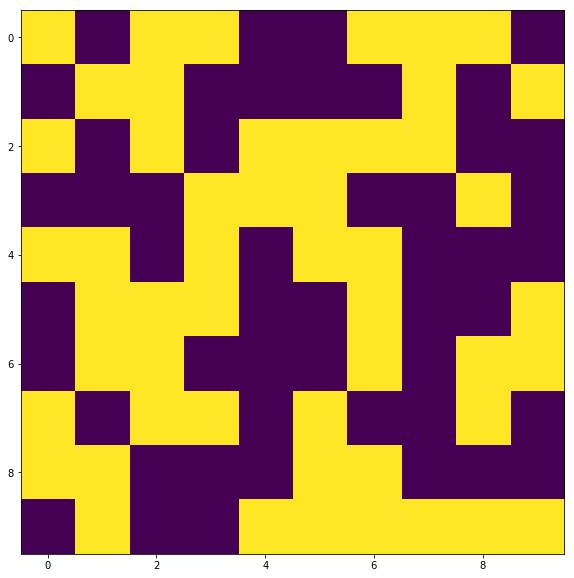

In [25]:
data = np.random.randint(0, 2, size=(10,10))
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
img = ax.imshow(data)

In [26]:
dstar = DStarLite(graph1, START, END)

In [27]:
SIMULATION = dstar.move_to_goal()

In [28]:
def init():
    img.set_data(data)
    return img,

In [29]:
def animate(current_pos):
    tmp = np.zeros_like(data)

    tmp[current_pos[1], current_pos[0]] = 1
    img.set_data(tmp)
    return img,

In [30]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=SIMULATION, interval=200, blit=True)

In [31]:
%pdb

Automatic pdb calling has been turned ON


In [32]:
# Requires ffmpeg installed - `brew install ffmpeg` on Mac
HTML(anim.to_html5_video())